# AOS111 week 5
## Goals
- [ ] Go through an example of SVMs using sklearn
- [ ] Understand the SVM algorithm
- [ ] Implement the SVM class (with kernel!)
- [ ] Understand the kernel
- [ ] Coding: Part 1: evaluate the linear Kernel matrix 
- [ ] Coding: Part 2: evaluate the expression for P
- [ ] Go through a polynomial example

Created by Donglai Ma, Sep 2020

## Linear kernel SVM
We will go through step by step and understand how to implement the SVM algorithm

Tips: This week's in class coding is longer than usual, so I suggest those who are using the jupyter notebook install the [nbextension](https://github.com/ipython-contrib/jupyter_contrib_nbextensions) to enable （table of contents) for better experience. There are other extensions there too.

### An example using sklearn
Lets first do a simple sklearn example to have a basic understanding of what support vectors looks like.

#### Data preparation

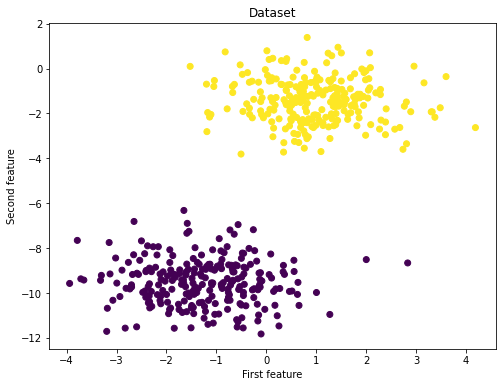

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2, n_samples = 500,random_state=2)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

#### Use sklearn to show the support vector machine

Input X shape is :(500, 2)
w_0,w_1,b:  0.30037283681729726 0.659531015156078 3.664674504779053


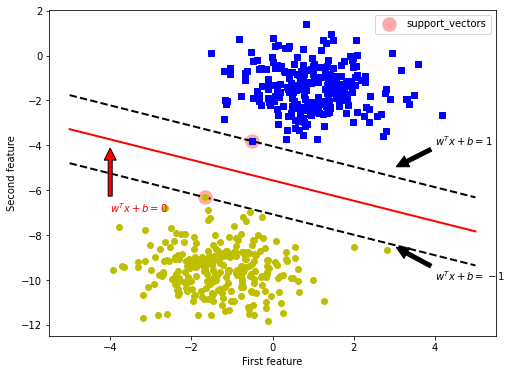

In [12]:
import numpy as np
from sklearn.svm import SVC
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)
print(f'Input X shape is :{X.shape}')


def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]
    print("w_0,w_1,b: ", w[0], w[1], b)

    margin = 1 / w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    # get support vectors
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0],
                svs[:, 1],
                s=180,
                facecolors='#FFAAAA',
                label='support_vectors')
    
    plt.plot(
        x0,
        decision_boundary,
        "r",
        linewidth=2,
    )
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)
    plt.legend()


fig, axes = plt.subplots(figsize=(8, 6))

plot_svc_decision_boundary(svm_clf, -5, 5)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo")
plt.xlabel("First feature")
plt.ylabel("Second feature")

# Add arrows on the plot
axes.annotate(
    r'$w^T x + b = 1$',
    xy=(3, -5),
    xytext=(4, -4),
    arrowprops=dict(facecolor='black', shrink=0.05),
)
axes.annotate(
    r'$w^T x + b = -1$',
    xy=(3, -8.5),
    xytext=(4, -10),
    arrowprops=dict(facecolor='black', shrink=0.05),
)
axes.annotate(
    r'$w^T x + b = 0$',
    xy=(-4, -4),
    xytext=(-4, -7),
    color='red',
    arrowprops=dict(facecolor='red', shrink=0.05),
)
plt.show()

We want to **find the maximum margin, and make sure that all the points are outside the region**, so we have
$$\max _{\boldsymbol{w}, b} \frac{2}{\|\boldsymbol{w}\|}$$
$$s.t. y_{i}\left(\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}_{i}+b\right) \geqslant 1, \quad i=1,2, \ldots, m$$

Please notice here the two targets are (1,-1), whereas in our data samples, they are (1,0).
And this problem could be rewritten to 
$$\min _{\boldsymbol{w}, b} \frac{1}{2}\|\boldsymbol{w}\|^{2}$$
$$s.t. y_{i}\left(\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}_{i}+b\right) \geqslant 1, \quad i=1,2, \ldots, m$$

So that's the major idea of SVM, our goal is to solve this problem!

### MySVM*
*This part is not required*

Let's try to solve this problem
$$\min _{\boldsymbol{w}, b} \frac{1}{2}\|\boldsymbol{w}\|^{2}$$
$$s.t. y_{i}\left(\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}_{i}+b\right) \geqslant 1, \quad i=1,2, \ldots, m$$

The Langrangian equation of this is 
$$
L(\boldsymbol{w}, b, \boldsymbol{\alpha})=\frac{1}{2}\|\boldsymbol{w}\|^{2}+\sum_{i=1}^{m} \alpha_{i}\left(1-y_{i}\left(\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}_{i}+b\right)\right)
$$
when we solve this we get the **dual problem**. If you want to get a better understanding of this part, **please check the document on CCLE under Resources (entitield "Understanding dual problem and KKT condition")**:

$$\begin{array}{l}\max _{\alpha} \sum_{i=1}^{m} \alpha_{i}-\frac{1}{2} \sum_{i=1}^{m} \sum_{j=1}^{m} \alpha_{i} \alpha_{j} y_{i} y_{j} \boldsymbol{x_{i}}^{\mathrm{T}} \boldsymbol{x_{j}} \\\begin{array}{ll}\text { s.t. } & \sum_{i=1}^{m} \alpha_{i} y_{i}=0 \\& \alpha_{i} \geqslant 0, \quad i=1,2, \ldots, m\end{array}\end{array}$$After we solve $\alpha$, we could get the model

$$\begin{aligned} f(\boldsymbol{x}) &=\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}+b \\ &=\sum_{i=1}^{m} \alpha_{i} y_{i} \boldsymbol{x}_{i}^{\mathrm{T}} \boldsymbol{x}+b \end{aligned}$$



#### QP problem
So the key point is to solve that dual problem, which is a quadratic programming problem.
How to solve a quadratic problem is a seperate course. As such, you can use the Python library [cvxopt](https://cvxopt.org/examples/tutorial/qp.html) to do so. More information can be found [here](https://cvxopt.org/examples/tutorial/qp.html).
An optimal algorithm for this problem is [SMO algorithm](https://en.wikipedia.org/wiki/Sequential_minimal_optimization), we won't cover it.

You may have not used cvxopt before, so make sure it is installed on your local environment.

A general QP problem is 
$$
\begin{array}{cl}\operatorname{minimize} & (1 / 2) x^{T} P x+q^{T} x \\ \text { subject to } & G x \leq h \\ & A x=b\end{array}
$$ In programming we also need to write our problem into the general format above so the cvxopt could solve it, here is an [example](https://cvxopt.org/examples/tutorial/qp.html).

Here $P \in \mathcal{S}_{+}^{n}, q \in \mathcal{R}^{n}, G \in \mathcal{R}^{m \times n}, h \in \mathcal{R}^{m}, A \in \mathcal{R}^{p \times n},$ and $b \in \mathcal{R}^{n}$ (S means [symmetric matrix](https://en.wikipedia.org/wiki/Definite_symmetric_matrix))

*A fun problem (just for thinking): why should P be written as a symmetric matrix? What's the property of that function if P is a positive-definite matrix?*

Now lets see how to write our dual problem to the matrix format above so we could program that:
$$\begin{array}{l}\max _{\alpha} \sum_{i=1}^{m} \alpha_{i}-\frac{1}{2} \sum_{i=1}^{m} \sum_{j=1}^{m} \alpha_{i} \alpha_{j} y_{i} y_{j} \boldsymbol{x_{i}}^{\mathrm{T}} \boldsymbol{x_{j}} \\\begin{array}{ll}\text { s.t. } & \sum_{i=1}^{m} \alpha_{i} y_{i}=0 \\& \alpha_{i} \geqslant 0, \quad i=1,2, \ldots, m\end{array}\end{array}$$

#### Solve QP problem

**The varaible is $\alpha$** and $ \in \mathcal{R}^{m} $(the shape is (m,1)) so:

$\frac{1}{2} \sum_{i=1}^{m} \sum_{j=1}^{m} \alpha_{i} \alpha_{j} y_{i} y_{j} \boldsymbol{x_{i}}^{\mathrm{T}} \boldsymbol{x_{j}} =\frac{1}{2} \sum_{i=1}^{m} \sum_{j=1}^{m}（y_{i} y_{j} \boldsymbol{x_{i}}^{\mathrm{T}} \boldsymbol{x_{j}}） \alpha_{i} \alpha_{j} =  \frac{1}{2} \sum_{i=1}^{m} \sum_{j=1}^{m}（P_{ij}） \alpha_{i} \alpha_{j} =\frac{1}{2} \alpha^{T} P \alpha$

Then we write P 

$P_{ij} = y_{i} y_{j} \boldsymbol{x_{i}}^{\mathrm{T}} \boldsymbol{x_{j}} = Y_{ij} * K_{ij}$ 

$Y = y \cdot (y^{\mathrm{T}})$,
K is actually called the **kernel matrix** (we'll learn more about this later), for **linear kernel**, $K = X\cdot (X^{\mathrm{T}})$
so $ P = (y \cdot y^{\mathrm{T}})* ( X\cdot X^{\mathrm{T}}) = (y \cdot y^{\mathrm{T}})*K$(Please think about the difference of dot and * here!)



For $- \sum_{i=1}^{m} \alpha_{i} = q^{T} \alpha$ ,so q = -np.ones((m,1))


For subject equation$\sum_{i=1}^{m} \alpha_{i} y_{i}=0  \rightarrow A\alpha = b $
so the $A = y^{\mathrm{T}}$ and 
$b = 0$

For the inequality  $\alpha_{i} \geqslant 0\rightarrow G \alpha \leq h $
So $G = -I, h = \boldsymbol 0$ (Please notice here $\boldsymbol 0 $ is not single 0)


After solve this, we got the alpha(shape = (m,1)), and only the non-zero $\alpha$ works.Why? Look back to the KKT condition and those $\alpha_{i} \neq 0 $ means $\left(y_{i} f\left(\boldsymbol{x}_{i}\right)-1\right)=0$ and that's those support vectors! (You could see that on the first plot)
$$
\left\{\begin{array}{l}
\alpha_{i} \geqslant 0 \\
y_{i} f\left(\boldsymbol{x}_{i}\right)-1 \geqslant 0 \\
\alpha_{i}\left(y_{i} f\left(\boldsymbol{x}_{i}\right)-1\right)=0
\end{array}\right.
$$



Then how to get the b? For each support vector, we got $$y_{s}\left(\sum_{i \in S} \alpha_{i} y_{i} \boldsymbol{x}_{i}^{\mathrm{T}} \boldsymbol{x}_{s}+b\right)=1$$

In the practice,a more stable way is that we use avreage value to get the b, S is the support vectors set:
$$b=\frac{1}{|S|} \sum_{s \in S}\left(y_{s}-\sum_{i \in S} \alpha_{i} y_{i} \boldsymbol{x}_{i}^{\mathrm{T}} \boldsymbol{x}_{s}\right)$$

### MySVM code (In class coding)
This week we are going to use the class data structure in python, it's a basic and important data structure, and I put two kernels in this class, you could add gaussian kernel in the future.

In [13]:
import cvxopt
import numpy


# Your codes start here
# A simple svm class
class mysvm:
    def __init__(self, kernel='linear', threshold=1e-5, degree=1):
        self.kernel = kernel
        self.threshold = 1e-5
        # degree is for poly kernel
        self.degree = degree

    def build_kernel(self, X):
        if self.kernel == 'linear':

            ############# Part 1: Linear kernel  ################
            #
            # Evaluate the expression of the linear Kernel, using 
            # the formula given in the block above
            self.K = 9999.9999
            ###################################################
            print(
                f"The kernel is using {self.kernel}, the kernel matrix size is {self.K.shape} "
            )
        if self.kernel == 'poly':
            self.K = np.dot(X, X.T)**self.degree
            print(
                f"The kernel is using {self.kernel}, the kernel matrix size is {self.K.shape} "
            )

    def fit(self, X, y):

        self.build_kernel(X)
        #change 0 to -1
        y = 2.0 * y - 1

        # Change y dimension (m,) -> (m,1) so we could do transpose
        y = np.expand_dims(y, axis=1)

        # Get total samples
        m = y.shape[0]
        print(f"The number of samples is {m}")

        ################# Part 2 Get the P, ###################
        #
        # Evaluate the expression for P, using 
        # the formula given in the block above
        P = 9999.9999
        ############################################################
        print(f"The P's shape is {P.shape}")
        q = -np.ones((m, 1))
        G = -np.eye(m)
        h = np.zeros(m)

        # Notice here need to change the int to float
        A = y.T.astype(float)
        b = 0.0

        sol = cvxopt.solvers.qp(cvxopt.matrix(P), cvxopt.matrix(q),
                                cvxopt.matrix(G), cvxopt.matrix(h),
                                cvxopt.matrix(A), cvxopt.matrix(b))

        alphas = np.array(sol['x'])

        # Find the (indices of the) support vectors,
        # which are the vectors with non-zero Lagrange multipliers
        self.sv = np.where((alphas > self.threshold))[0]
        self.nsupport = len(self.sv)
        print(self.nsupport, "support vectors found")
        self.support_vectors_ = X[self.sv, :]
        print(self.support_vectors_)

        self.alphas = alphas[self.sv]
        self.targets = y[self.sv]

        # Get b
        self.b = np.sum(self.targets)
        for n in range(self.nsupport):
            self.b -= np.sum(self.alphas * self.targets *
                             np.reshape(self.K[self.sv[n], self.sv],
                                        (self.nsupport, 1)))
        self.b /= len(self.alphas)
        self.intercept_ = np.array([self.b])
        # Get w
        if self.kernel is 'linear':

            self.w = np.sum(self.alphas * self.targets * self.support_vectors_,
                            axis=0)

            self.coef_ = np.array([self.w])

        if self.kernel is 'poly':
            pass

#### My SVM test
Now use our own svm class to test the result, it should be the same with the sklearn one!

The kernel is using linear, the kernel matrix size is (500, 500) 
The number of samples is 500
The P's shape is (500, 500)
     pcost       dcost       gap    pres   dres
 0: -2.5974e+01 -4.4450e+01  1e+03  3e+01  2e+00
 1: -1.8772e+01 -3.9073e+00  1e+02  4e+00  2e-01
 2: -5.8717e+00 -5.2410e-01  3e+01  9e-01  4e-02
 3: -2.6381e-01 -2.8189e-01  4e-01  8e-03  4e-04
 4: -2.5843e-01 -2.6308e-01  3e-02  5e-04  2e-05
 5: -2.6251e-01 -2.6261e-01  4e-04  6e-06  3e-07
 6: -2.6260e-01 -2.6260e-01  4e-06  6e-08  3e-09
 7: -2.6260e-01 -2.6260e-01  4e-08  6e-10  3e-11
Optimal solution found.
2 support vectors found
[[-1.65162108 -6.32050939]
 [-0.50779053 -3.8089916 ]]
w_0,w_1,b:  0.30037287396632484 0.6595310456041095 3.6646745284712487


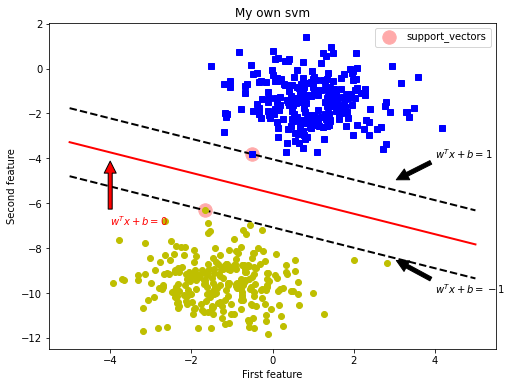

In [14]:
### Use our own svm class!

mySVM = mysvm(kernel='linear')

mySVM.fit(X, y)
fig, axes = plt.subplots(figsize=(8, 6))
plot_svc_decision_boundary(mySVM, -5, 5)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.title("My own svm")

# Add arrows on the plot
axes.annotate(
    r'$w^T x + b = 1$',
    xy=(3, -5),
    xytext=(4, -4),
    arrowprops=dict(facecolor='black', shrink=0.05),
)
axes.annotate(
    r'$w^T x + b = -1$',
    xy=(3, -8.5),
    xytext=(4, -10),
    arrowprops=dict(facecolor='black', shrink=0.05),
)
axes.annotate(
    r'$w^T x + b = 0$',
    xy=(-4, -4),
    xytext=(-4, -7),
    color='red',
    arrowprops=dict(facecolor='red', shrink=0.05),
)
plt.show()

### Understand kernels
Similar problem in high dimension is : $f(\boldsymbol{x})=\boldsymbol{w}^{\mathrm{T}} \phi(\boldsymbol{x})+b$

With same steps, we could get the dual problem:
$$\begin{array}{l}
\max _{\alpha} \sum_{i=1}^{m} \alpha_{i}-\frac{1}{2} \sum_{i=1}^{m} \sum_{j=1}^{m} \alpha_{i} \alpha_{j} y_{i} y_{j} \phi\left(\boldsymbol{x}_{i}\right)^{\mathrm{T}} \phi\left(\boldsymbol{x}_{j}\right) \\
\text { s.t. } \sum_{i=1}^{m} \alpha_{i} y_{i}=0 \\
\alpha_{i} \geqslant 0, \quad i=1,2, \ldots, m
\end{array}$$

Back to the previous block, you would notice that in the calculation process, x^T and x always appear together as $<\boldsymbol{x}_{i},\boldsymbol{x}_{j}>$
To calculate $$\phi\left(\boldsymbol{x}_{i}\right)^{\mathrm{T}} \phi\left(\boldsymbol{x}_{j}\right)$$
we could imagine $$\kappa\left(\boldsymbol{x}_{i}, \boldsymbol{x}_{j}\right)=\left\langle\phi\left(\boldsymbol{x}_{i}\right), \phi\left(\boldsymbol{x}_{j}\right)\right\rangle=\phi\left(\boldsymbol{x}_{i}\right)^{\mathrm{T}} \phi\left(\boldsymbol{x}_{j}\right)$$ to avoid calculate $\phi\left(\boldsymbol{x}_{i}\right)^{\mathrm{T}} \phi\left(\boldsymbol{x}_{j}\right)$

We could get the solution
$$\begin{aligned} f(\boldsymbol{x}) &=\boldsymbol{w}^{\mathrm{T}} \phi(\boldsymbol{x})+b \\ &=\sum_{i=1}^{m} \alpha_{i} y_{i} \phi\left(\boldsymbol{x}_{i}\right)^{\mathrm{T}} \phi(\boldsymbol{x})+b \\ &=\sum_{i=1}^{m} \alpha_{i} y_{i} \kappa\left(\boldsymbol{x}, \boldsymbol{x}_{i}\right)+b \end{aligned}$$




Here are some useful kernels:


| Name | &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Expression&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;|
| :--- | : ----: |
| Linear |$\kappa\left(\boldsymbol{x}_{i},\boldsymbol{x}_{j}\right)=\boldsymbol{x}_{i}^{\mathrm{T}} \boldsymbol{x}_{j}$|
| Polynomial|$\kappa\left(\boldsymbol{x}_{i}, \boldsymbol{x}_{j}\right)=\left(\boldsymbol{x}_{i}^{\mathrm{T}} \boldsymbol{x}_{j}\right)^{d}$  |
|Gaussian RBF|$\kappa\left(\boldsymbol{x}_{i}, \boldsymbol{x}_{j}\right)=\exp \left(-\frac{\left\|\boldsymbol{x}_{i}-\boldsymbol{x}_{j}\right\|^{2}}{2 \sigma^{2}}\right)$|



**Now back to our class and check the poly kernel you could notice that there is no $\phi(\boldsymbol{x})$ during the whole function, there is just K**





## A higher dimension example(Polynomial kernel)
Now lets look at a dataset that can not be linearly seperated

(400, 2)


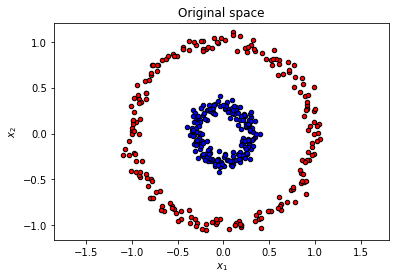

In [15]:

from sklearn.datasets import make_circles

np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)
plt.figure()
print(X.shape)

reds = y == 0
blues = y == 1
plt.subplot(aspect='equal')

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')

plt.axis('equal')
plt.title("Original space")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.show()

This dataset you could only seperate them in high dimension with a hyperplane.

If we use a polynomial kernel, for degree = 2(same example in the lecture), the expression is $\boldsymbol{\phi}(\mathbf{x})=\left\{x_{1}^{2}, x_{2}^{2}, \sqrt{2} x_{1} x_{2}\right\}$(This is for showing the plot, in the real mission we don't need to know this  $\phi(x)$)

In [16]:
import plotly.graph_objects as go
import numpy as np

reds = y == 0
blues = y == 1
a = X[:, 0]**2
b = X[:, 1]**2
c = X[:, 0] * X[:, 1] * np.sqrt(2)

t = np.linspace(0, 10, 50)

fig = go.Figure(data=[
    go.Scatter3d(x=a[reds],
                 y=b[reds],
                 z=c[reds],
                 mode='markers',
                 marker=dict(size=2, color='red')),
    go.Scatter3d(x=a[blues],
                 y=b[blues],
                 z=c[blues],
                 mode='markers',
                 marker=dict(size=2, color='blue'))
])
fig.update_layout(scene=dict(xaxis_title=r"x_1^2",
                             yaxis_title=r"x_2^2",
                             zaxis_title=r"$\sqrt{2} x_1 x_2$"))
fig.show()

### Polynomial svm
Now use our own kernel to solve this:

In [17]:
mySVM = mysvm(kernel='poly',degree=2)
mySVM.fit(X, y)

The kernel is using poly, the kernel matrix size is (400, 400) 
The number of samples is 400
The P's shape is (400, 400)
     pcost       dcost       gap    pres   dres
 0: -1.4078e+01 -3.3070e+01  9e+02  3e+01  2e+00
 1:  2.3442e+00 -2.9882e+01  6e+01  9e-01  5e-02
 2: -4.2136e+00 -1.4839e+01  1e+01  1e-01  6e-03
 3: -6.4452e+00 -1.0561e+01  4e+00  3e-02  1e-03
 4: -7.4802e+00 -1.1076e+01  4e+00  2e-02  9e-04
 5: -9.0119e+00 -1.0597e+01  2e+00  7e-03  4e-04
 6: -9.5172e+00 -1.0396e+01  9e-01  3e-03  2e-04
 7: -9.8599e+00 -1.0249e+01  4e-01  3e-15  1e-15
 8: -1.0212e+01 -1.0218e+01  6e-03  3e-15  2e-15
 9: -1.0217e+01 -1.0217e+01  6e-05  8e-15  2e-15
10: -1.0217e+01 -1.0217e+01  6e-07  8e-16  1e-15
Optimal solution found.
4 support vectors found
[[ 0.61029279 -0.69766785]
 [-0.04555279 -0.42230081]
 [ 0.5932876   0.63784786]
 [-0.21809353  0.90150832]]


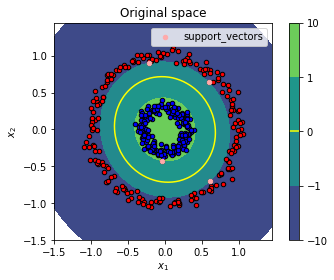

In [18]:
# get the f(x)

def f(x,svm):
    f_x = 0
    for i in range(svm.nsupport):
        x_i = np.expand_dims(svm.support_vectors_[i],axis = 1)
        
        k = np.dot(x.T,x_i)**2
        
        f_x +=svm.alphas[i]*svm.targets[i]*k
    f_x +=svm.b
    return f_x[0,0]

x1 = x2 = np.arange(-1.5, 1.5, 0.05)
X1, X2 = np.meshgrid(x1, x2)
Z = np.zeros((len(x2), len(x1)))
for i in range(len(x2)):
    for j in range(len(x1)):
        x_vec = np.array([[x1[j]], [x2[i]]])
        Z[i, j] = f(x_vec, mySVM)

fig, ax = plt.subplots()
ax.set_aspect('equal')
levels = [-10,-1, 0, 1,10]
cs = ax.contourf(X1, X2, Z,levels)
cbar = fig.colorbar(cs)
cs2 = ax.contour(cs, levels=[0], colors='yellow')
cbar.add_lines(cs2)
plt.scatter(X[reds, 0], X[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue", s=20, edgecolor='k')
svs = mySVM.support_vectors_

plt.scatter(svs[:, 0],
            svs[:, 1],
            s=20,
            facecolors='#FFAAAA',
            label='support_vectors')
plt.title("Original space")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()
# get the points on the boundary
p = cs2.collections[0].get_paths()[0]
v = p.vertices

### Hyperplane in high dimension

Now we got the yellow line which is the seperate boundary, let's put that in the high dimension, rotate that plt you could find it's  a hyperplane

In [19]:
reds = y == 0
blues = y == 1
a = X[:, 0]**2
b = X[:, 1]**2
c = X[:, 0] * X[:, 1] * np.sqrt(2)

t = np.linspace(0, 10, 50)

fig = go.Figure(data=[
    go.Scatter3d(x=a[reds],
                 y=b[reds],
                 z=c[reds],
                 mode='markers',
                 marker=dict(size=2, color='red')),
    go.Scatter3d(x=a[blues],
                 y=b[blues],
                 z=c[blues],
                 mode='markers',
                 marker=dict(size=2, color='blue')),
    go.Scatter3d(x=v[:, 0]**2,
                 y=v[:, 1]**2,
                 z=v[:, 0]* v[:,1]*np.sqrt(2),
                 mode='markers',
                 name = 'points on hyperplane',
                 marker=dict(size=4, color='yellow')),
    go.Scatter3d(x=svs[:, 0]**2,
                 y=svs[:, 1]**2,
                 z=svs[:, 0]* svs[:,1]*np.sqrt(2),
                 mode='markers',
                 name = 'support vectors',
                 marker=dict(size=4, color='black'))
    
    
])
fig.update_layout(scene=dict(xaxis_title=r"x_1^2",
                             yaxis_title=r"x_2^2",
                             zaxis_title=r"$\sqrt{2} x_1 x_2$"))
fig.show()